In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#YEAR 1990 to 2021
dataset = pd.read_csv('climate_change_dataset.csv')





In [20]:
# Check data types
print("\nClimate Change dataset info:")
dataset.info()


Climate Change dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      32 non-null     int64  
 1   Sea Level Rise            32 non-null     float64
 2   Greenhouse Gas Emissions  32 non-null     float64
 3   Temperature               32 non-null     float64
 4   Ice Extent                32 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


In [21]:
# Descriptive statistics for Arctic Sea Ice Extent dataset
print("\nDescriptive statistics for Arctic Sea Ice Extent dataset:")
print(dataset['Ice Extent'].describe())

# Descriptive statistics for Global Annual Mean Temperature dataset
print("\nDescriptive statistics for Global Annual Mean Temperature dataset:")
print(dataset['Temperature'].describe())

print("\nDescriptive statistics for Global Sea Level dataset:")
print(dataset['Sea Level Rise'].describe())

print("\nDescriptive statistics for Greenhouse Gases dataset:")
print(dataset['Greenhouse Gas Emissions'].describe())



Descriptive statistics for Arctic Sea Ice Extent dataset:
count    32.000000
mean      5.396781
std       1.023928
min       3.387000
25%       4.607750
50%       5.478500
75%       6.073000
max       7.209000
Name: Ice Extent, dtype: float64

Descriptive statistics for Global Annual Mean Temperature dataset:
count    32.000000
mean      0.612500
std       0.219118
min       0.220000
25%       0.450000
50%       0.625000
75%       0.725000
max       1.020000
Name: Temperature, dtype: float64

Descriptive statistics for Global Sea Level dataset:
count    32.000000
mean     19.322579
std      29.660296
min     -22.847396
25%      -4.689062
50%      14.135938
75%      47.995854
max      66.704325
Name: Sea Level Rise, dtype: float64

Descriptive statistics for Greenhouse Gases dataset:
count       32.000000
mean     40868.282812
std       6032.031893
min      32735.020000
25%      35280.795000
50%      41527.855000
75%      46571.577500
max      49843.570000
Name: Greenhouse Gas Emission

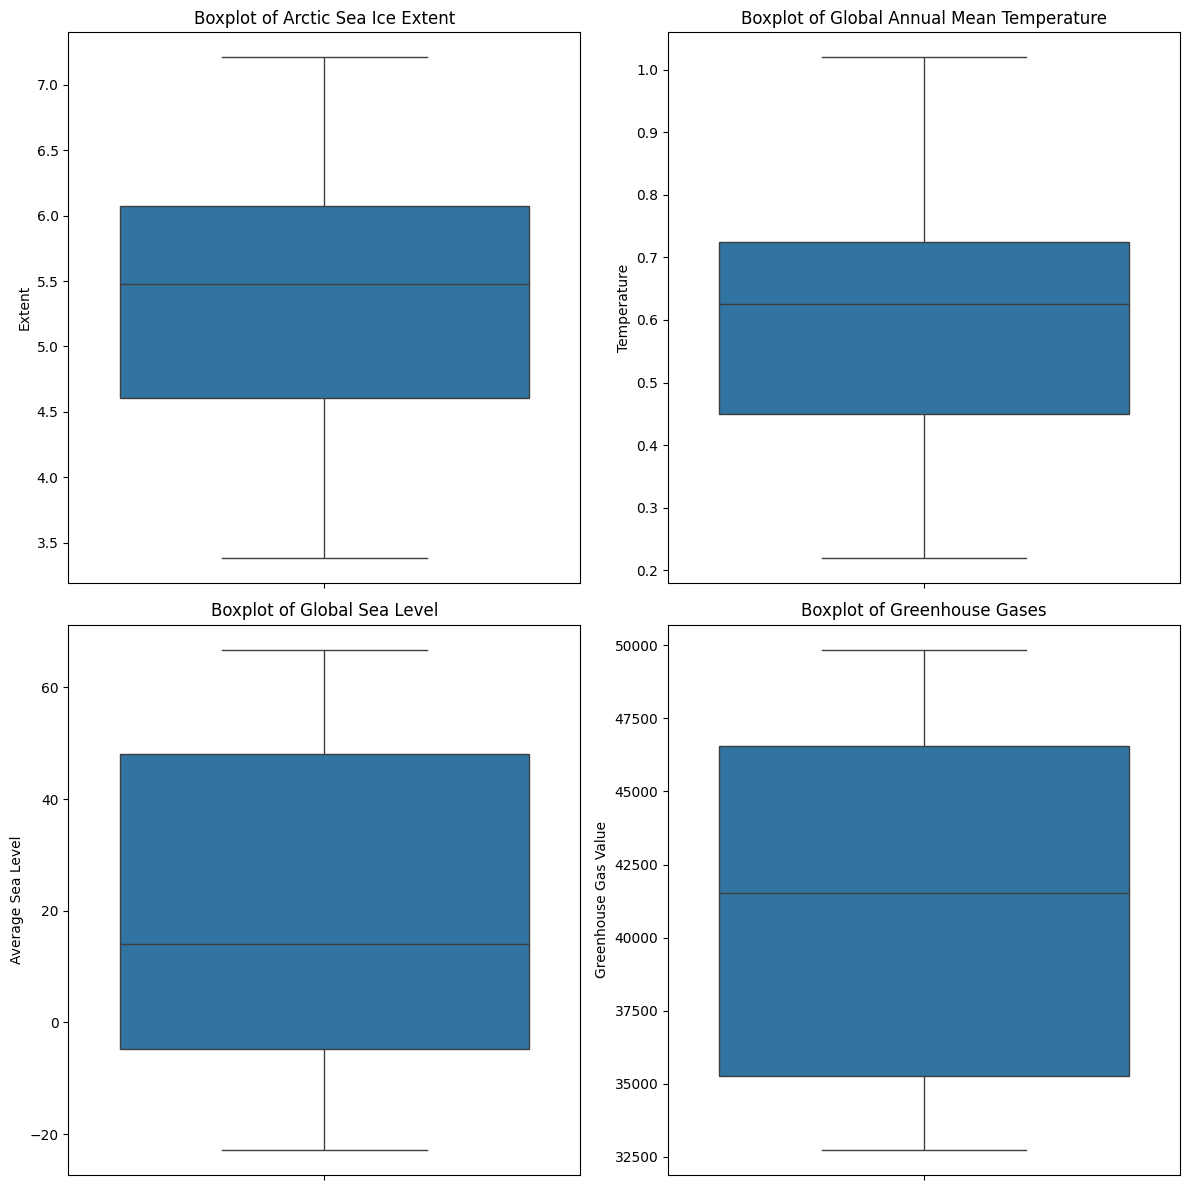

In [22]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for Arctic Sea Ice Extent
sns.boxplot(ax=axes[0], y=dataset['Ice Extent'])
axes[0].set_title('Boxplot of Arctic Sea Ice Extent')
axes[0].set_ylabel('Extent')

# Create a boxplot for Global Annual Mean Temperature
sns.boxplot(ax=axes[1], y=dataset['Temperature'])
axes[1].set_title('Boxplot of Global Annual Mean Temperature')
axes[1].set_ylabel('Temperature')

# Create a boxplot for Global Sea Level
sns.boxplot(ax=axes[2], y=dataset['Sea Level Rise'])
axes[2].set_title('Boxplot of Global Sea Level')
axes[2].set_ylabel('Average Sea Level')

# Create a boxplot for Greenhouse Gases
sns.boxplot(ax=axes[3], y=dataset['Greenhouse Gas Emissions'])
axes[3].set_title('Boxplot of Greenhouse Gases')
axes[3].set_ylabel('Greenhouse Gas Value')


# Adjust layout
plt.tight_layout()
plt.show()


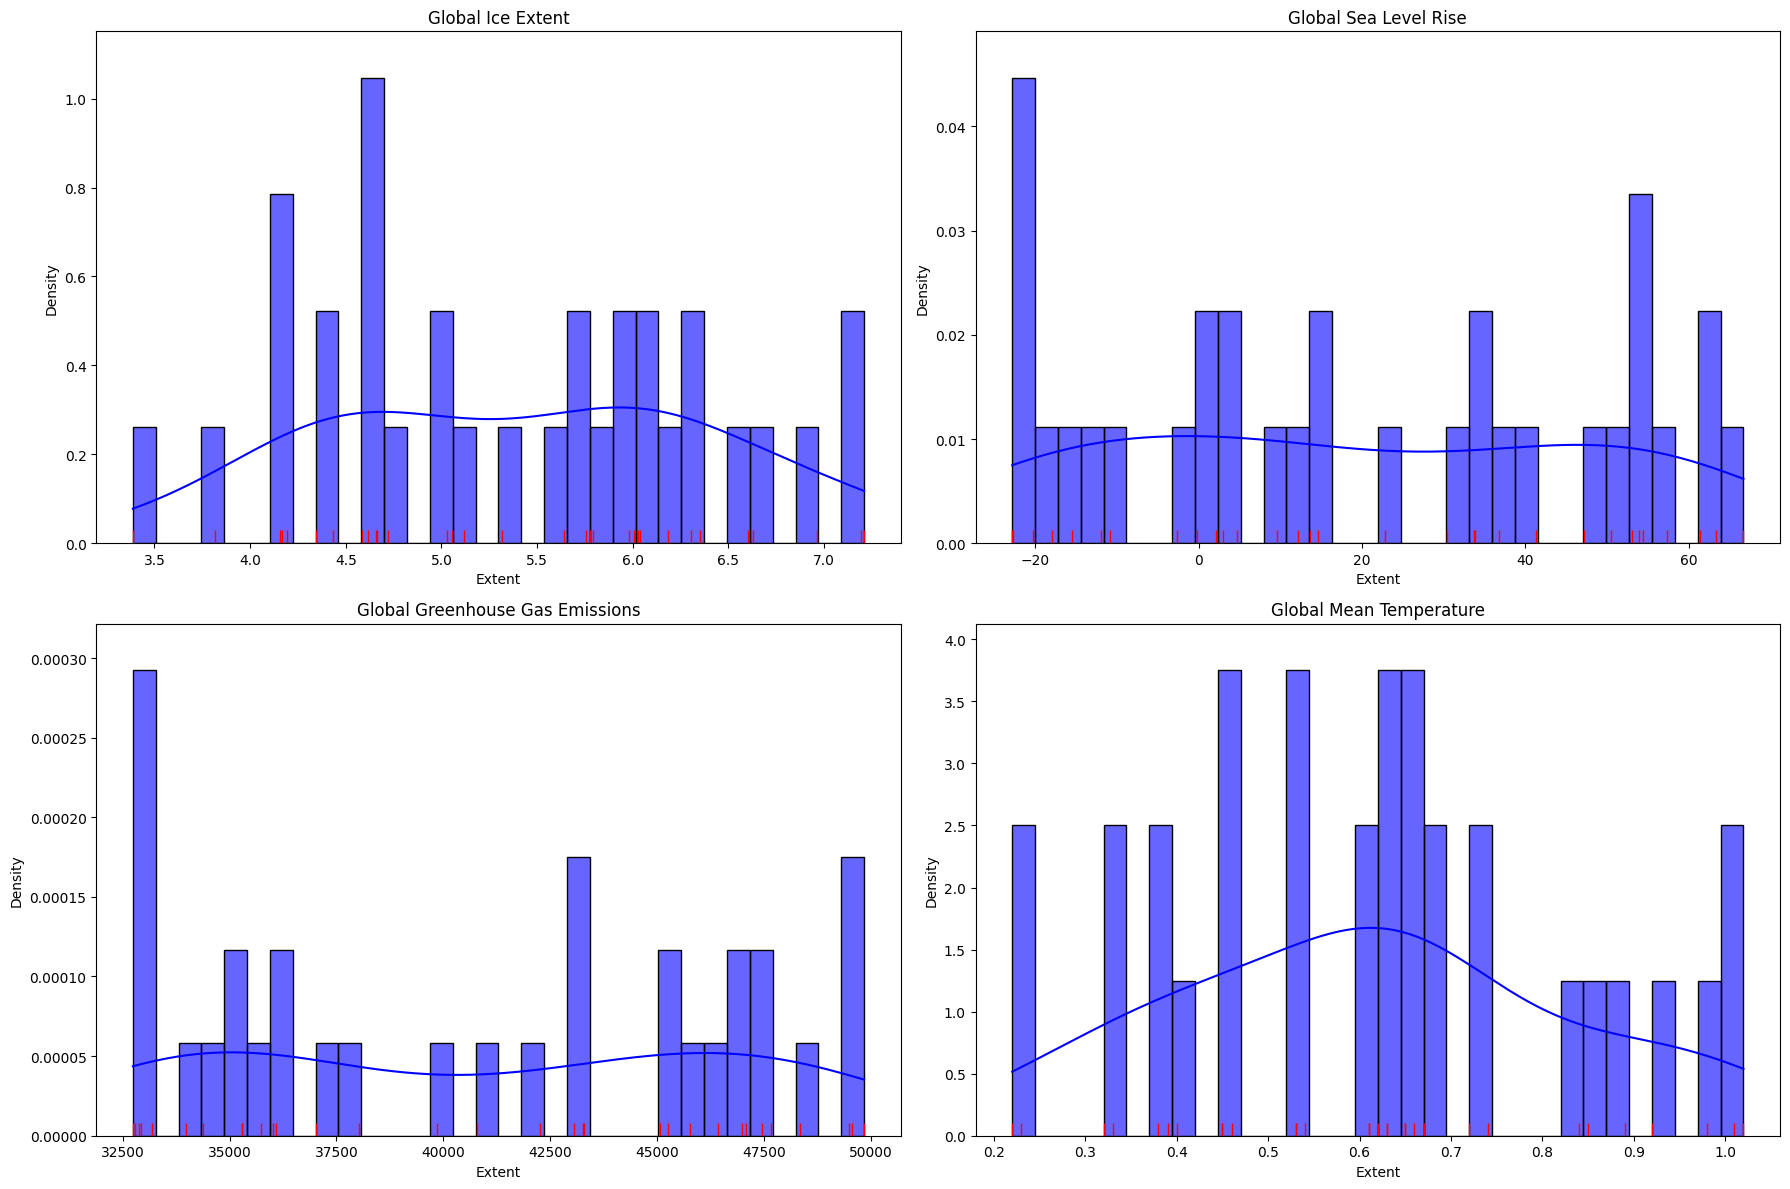

In [23]:
def histogram_density_rug(ax, dataframe, title, x_label, y_label):
    sns.histplot(dataframe, bins=32, kde=True, stat='density', color='blue', alpha=0.6, edgecolor='black', ax=ax)
    sns.rugplot(dataframe, color='red', lw=1, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Create a figure with subplots (2 rows and 3 columns)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the array to make indexing easier

# Plot each dataset in a separate subplot
histogram_density_rug(axes[0], dataset['Ice Extent'], "Global Ice Extent", "Extent", "Density")
histogram_density_rug(axes[1], dataset['Sea Level Rise'], "Global Sea Level Rise", "Extent", "Density")
histogram_density_rug(axes[2], dataset['Greenhouse Gas Emissions'], "Global Greenhouse Gas Emissions", "Extent", "Density")
histogram_density_rug(axes[3], dataset['Temperature'], "Global Mean Temperature", "Extent", "Density")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the combined figure
plt.show()


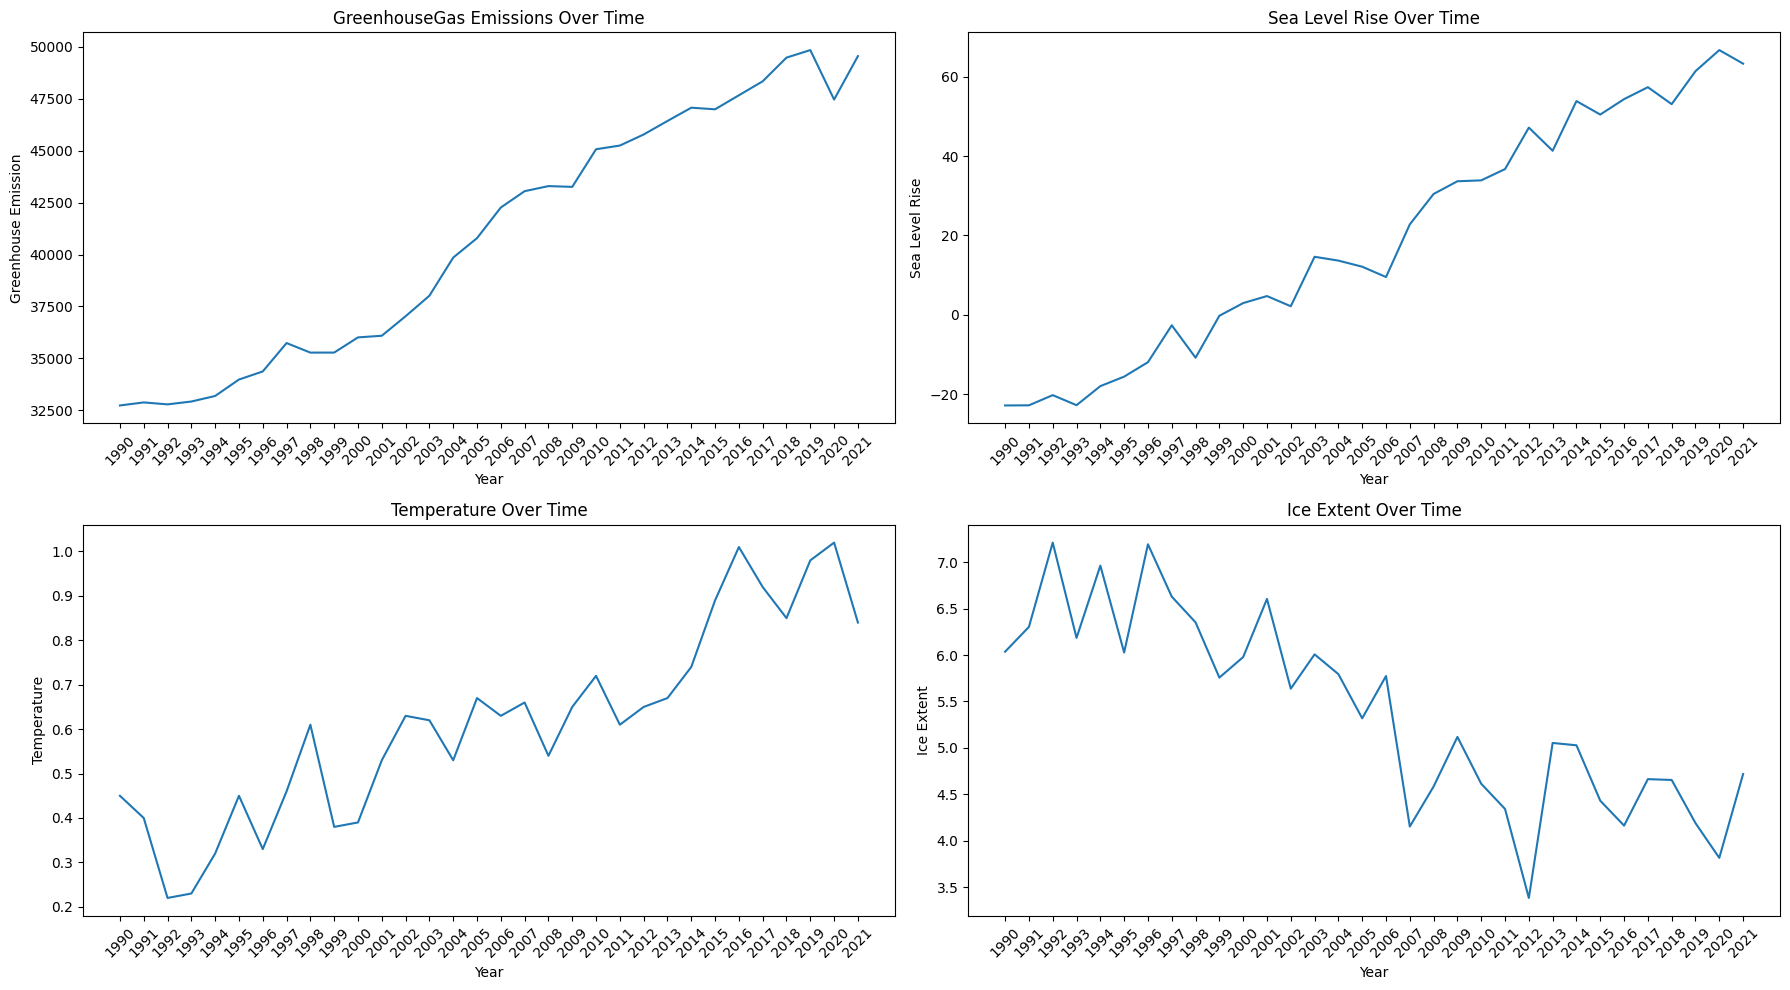

In [24]:
def timeseries(ax, dataframeX, dataframeY, title, x_label, y_label):
    sns.lineplot(x=dataframeX, y=dataframeY, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.set_xticks(ticks=range(int(dataframeX.min()), int(dataframeX.max()) + 1, 1))
    ax.tick_params(axis='x', rotation=45)
  

fig, axes = plt.subplots(2,2, figsize=(18,10))
axes = axes.flatten()


timeseries(axes[0],dataset['Year'], dataset['Greenhouse Gas Emissions'], "GreenhouseGas Emissions Over Time", "Year", "Greenhouse Emission")
timeseries(axes[1],dataset['Year'], dataset['Sea Level Rise'], "Sea Level Rise Over Time", "Year", "Sea Level Rise")
timeseries(axes[2],dataset['Year'], dataset['Temperature'], "Temperature Over Time", "Year", "Temperature")
timeseries(axes[3],dataset['Year'], dataset['Ice Extent'], "Ice Extent Over Time", "Year", "Ice Extent")
    
# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the combined figure
plt.show()
        
    

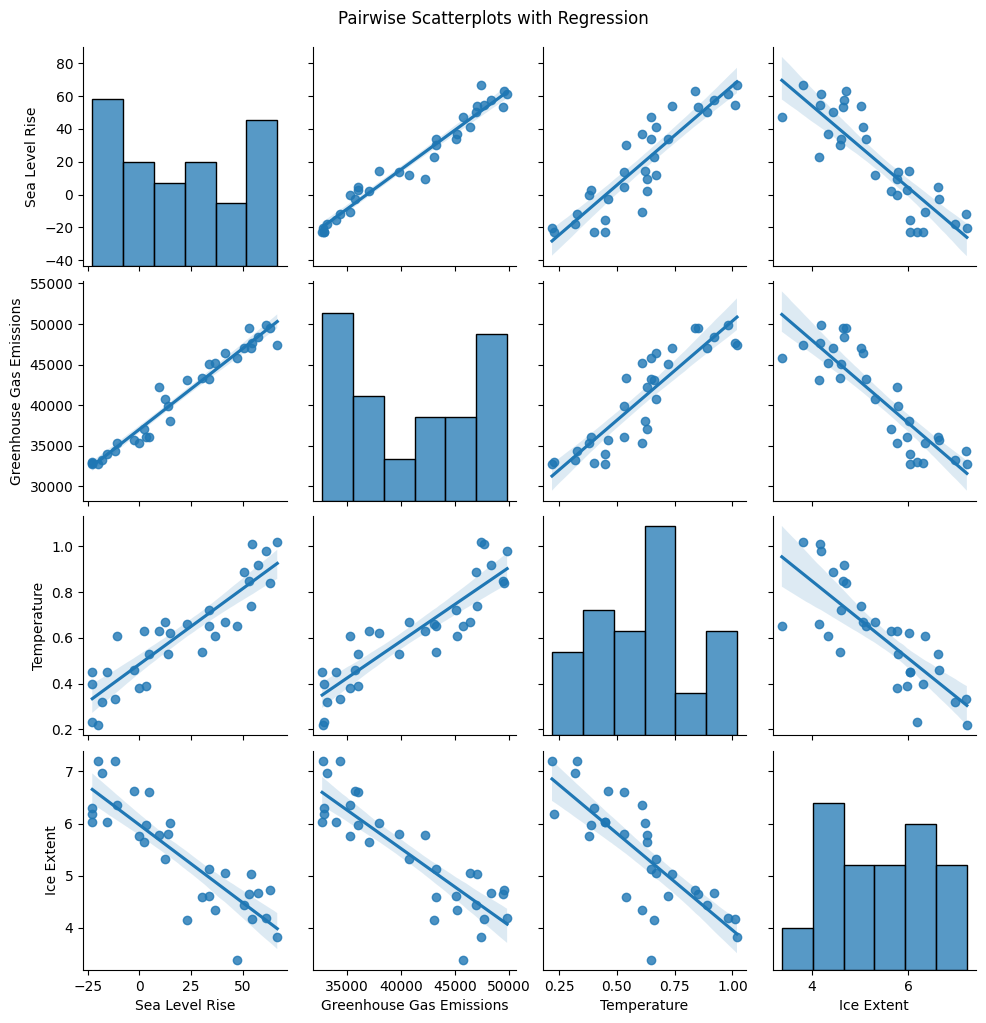

In [25]:
# Create pairwise scatterplot with regression
sns.pairplot(dataset.iloc[:, 1:], kind='reg', diag_kind='hist')

# Show the plot
plt.suptitle('Pairwise Scatterplots with Regression', y=1.02)  # Adjust title position
plt.show()

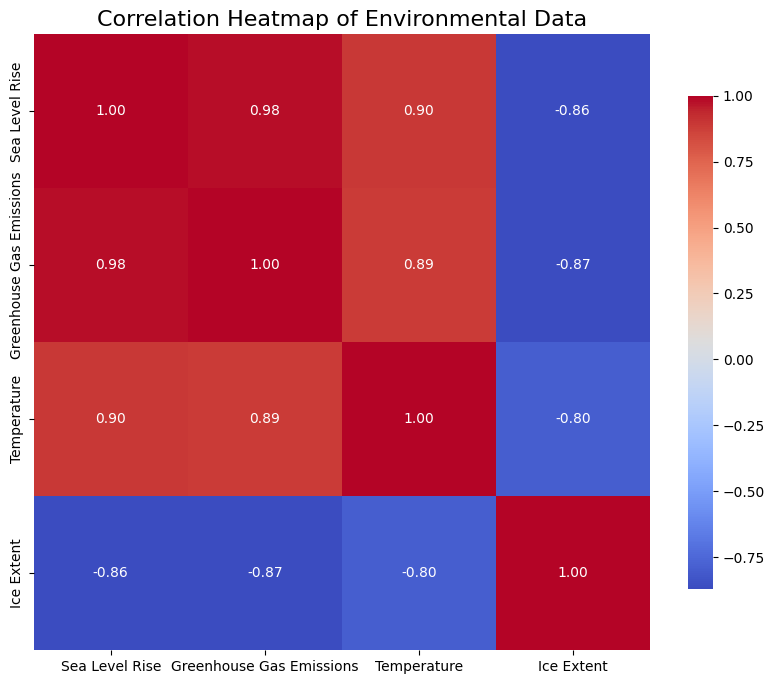

In [26]:
# Create a consolidated DataFrame with relevant columns

# Calculate the correlation matrix
correlation_matrix = dataset.iloc[:, 1:].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap of Environmental Data', fontsize=16)

# Show the plot
plt.show()